In [6]:
import getdata as gd
import pandas as pd
import numpy as np
%matplotlib inline  

In [2]:
v = gd.get_historical('V', '2016-01-01', '2017-05-01')
v.head()

,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume
333,74.985894,75.699997,2016-01-04,76.379997,75.010002,76.059998,V,13476800
332,75.550517,76.269997,2016-01-05,76.510002,75.540001,76.250000,V,8972700
331,74.559950,75.269997,2016-01-06,75.849998,74.849998,75.000000,V,16092000
330,73.093916,73.790001,2016-01-07,75.089996,73.349998,73.760002,V,12470800
329,72.192496,72.879997,2016-01-08,74.510002,72.750000,74.059998,V,9977600


In [3]:
ts = list(v['Close'].values)

In [4]:
import statsmodels.tsa.stattools as stat

/Users/lweilong/anaconda3/envs/trading/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Showned below, adf test value is 0.405, however the 10% critical value is -2.587. Cause 0.405 > -2.587, so this time series is not stationary

In [5]:
stat.adfuller(ts)

(-0.45075081572246845,
 0.90127417203536542,
 9,
 324,
 {'1%': -3.4506952633323831,
  '10%': -2.5715449066453284,
  '5%': -2.8705021892646601},
 843.32364756377467)

# Half-life

In [6]:
from scipy import stats

In [7]:
v_laged = v.shift()
v_laged.head()

,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume
333,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
332,74.985894,75.699997,2016-01-04,76.379997,75.010002,76.059998,V,13476800.0
331,75.550517,76.269997,2016-01-05,76.510002,75.540001,76.250000,V,8972700.0
330,74.559950,75.269997,2016-01-06,75.849998,74.849998,75.000000,V,16092000.0
329,73.093916,73.790001,2016-01-07,75.089996,73.349998,73.760002,V,12470800.0


In [8]:
delta_y = (v['Close'] - v_laged['Close']).dropna()

In [9]:
ts_lagged = list(v_laged['Close'].dropna().values)

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ts_lagged, delta_y)

In [11]:
halflife = -np.log(2)/slope
halflife

68.142321326354818

# Linear Mean Reversion

In [21]:
lookback = 68

In [31]:
rolling = v['Close'].rolling(window=lookback, min_periods=1)
rolling_average = rolling.mean()
rolling_std = rolling.std()

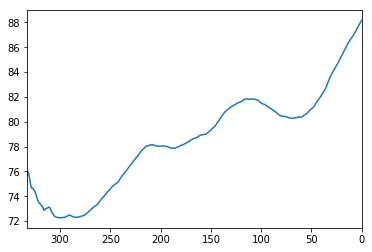

In [29]:
rolling_average.plot()

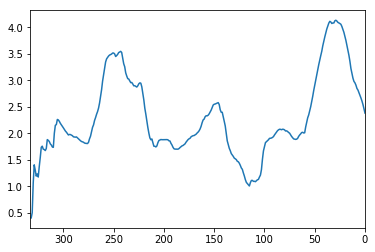

In [32]:
rolling_std.plot()

In [35]:
makVal = - (v['Close'] - rolling_average)/rolling_std

In [37]:
pnl = makVal.shift().dropna()*delta_y/v_laged['Close']

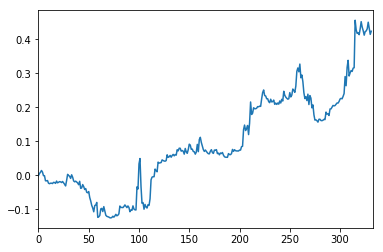

In [39]:
pnl.cumsum().plot()

# Cointegration

In [1]:
import datetime
import pandas_datareader as pdr

In [2]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2013, 1, 1)

arex = pdr.DataReader("AREX", "yahoo", start, end)
wll = pdr.DataReader('WLL', 'yahoo', start, end)

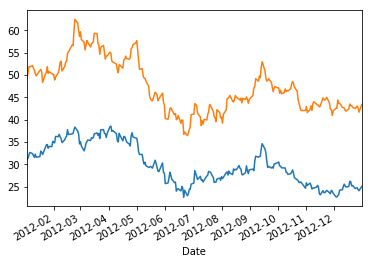

In [8]:
ax = arex['Adj Close'].plot()
ax.plot(wll['Adj Close'])

In [16]:
from statsmodels.regression.linear_model import OLS

In [21]:
model = OLS(arex['Adj Close'], wll['Adj Close'])
res = model.fit()
beta = res.params['Adj Close']
beta

0.63328815237532543

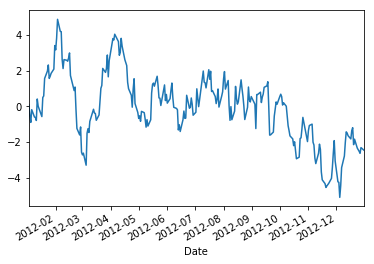

In [22]:
result = arex['Adj Close'] - beta*wll['Adj Close']
result.plot()

In [23]:
import pprint
import statsmodels.tsa.stattools as ts
cadf = ts.adfuller(result)
pprint.pprint(cadf)

(-2.6310230152629441,
 0.08675343877590741,
 0,
 249,
 {'1%': -3.4568881317725864,
  '10%': -2.5729936189738876,
  '5%': -2.8732185133016057},
 467.04137180757959)
